In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 

In [51]:
a = 1; sigma = 2; D = -1; epsilon = .539; Omega = 2*np.pi*0;
def RHS_model_linear_4th_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(y)).real*np.cos(Omega*t)*D/3
    dydt += -a*y**(sigma-1)*(fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real) 
    dydt += -epsilon**2*fft.ifft(n**4*(2*np.pi/L*1j)**4*fft.fft(y)).real/3
    return dydt

In [72]:
beta = 3
N = 1; Tf = 100; Nt = 600; Nx = 700
L = np.pi*2
dx = L/Nx
t = np.linspace(0,Tf, Nt)
t_span = (0, Tf)
y = np.zeros((Nx, Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)
u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)+0.3
u0 = -np.cos(1*x)/2+1
#u0 = np.exp(-beta*(x-L/4)**2)*np.sqrt(beta/np.pi)+np.exp(-beta*(x-3*L/4)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_model_linear_4th_pseudo_spectral, t_span, u0, 'BDF', 
                                       atol = 1e-7, t_eval =t)
u = result_ivp.y
print(np.shape(u))

(700, 600)


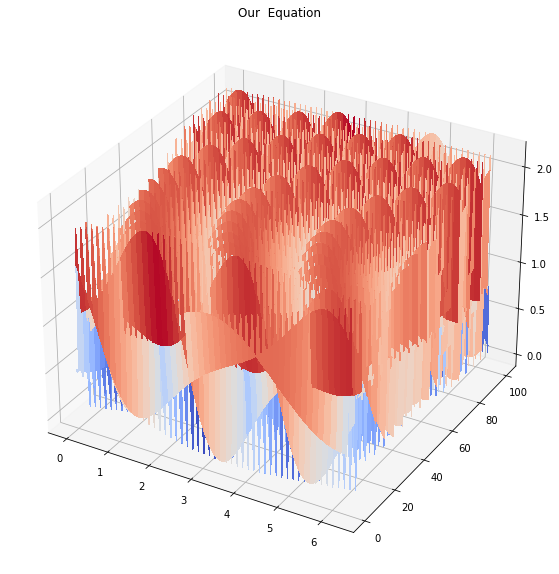

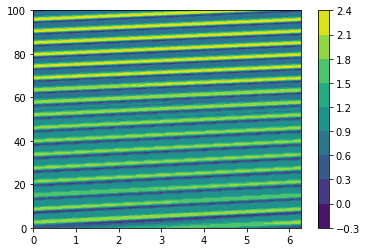

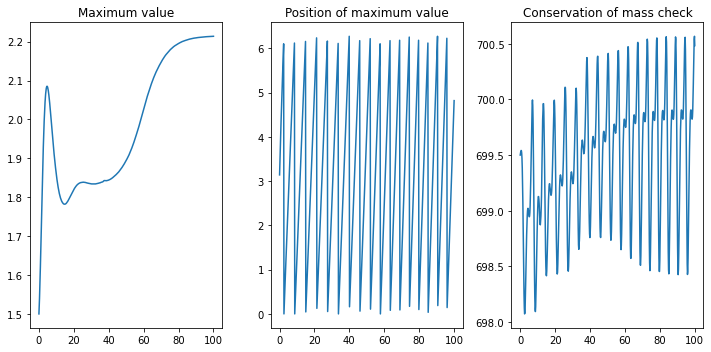

In [73]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Our  Equation')
plt.show()

#Maybe do a heat map instead
plt.contourf(x,t,u.T); plt.colorbar()
plt.show()


fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
ax[0].set_title('Maximum value'); ax[0].plot(t, np.max(u, axis=0)); 
ax[1].set_title('Position of maximum value'); ax[1].plot(t, x[np.argmax(u, axis=0)])
ax[2].plot(t, np.trapz(u, axis=0));ax[2].set_title('Conservation of mass check')
plt.tight_layout()
#plt.plot(t, np.sqrt(beta/np.pi)*1/np.sqrt(4*D*beta/Omega*np.sin(Omega*t)+1)+0.3)
#plt.plot(t,np.exp(-4**2*(np.sin(Omega*t)*D/Omega)))
plt.show()

(700, 600)


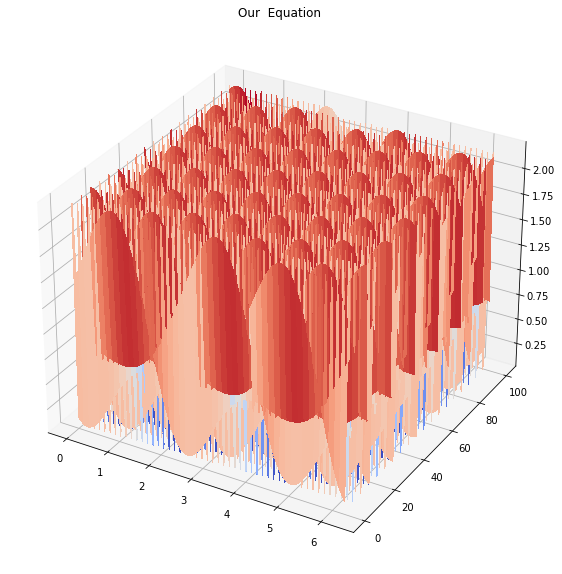

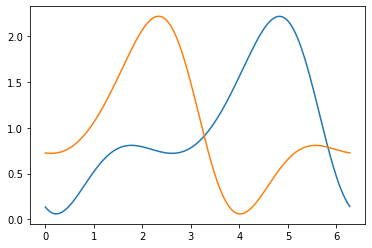

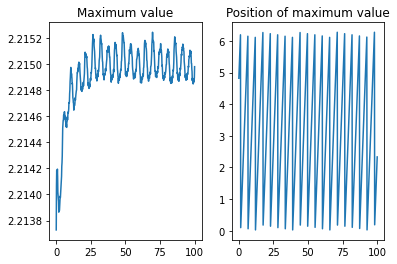

array([4.82010073, 5.01757227, 5.2150438 , 5.41251534, 5.6010109 ,
       5.79848244, 5.99595398, 6.19342552, 0.09873577, 0.29620731,
       0.49367885, 0.6821744 , 0.87964594, 1.07711748, 1.27458902,
       1.46308458, 1.66055612, 1.85802766, 2.05549919, 2.24399475,
       2.44146629, 2.63893783, 2.83640937, 3.02490493, 3.22237646,
       3.419848  , 3.61731954, 3.8058151 , 4.00328664, 4.20075818,
       4.39822972, 4.58672527, 4.78419681, 4.98166835, 5.17016391,
       5.36763545, 5.56510699, 5.76257852, 5.95107408, 6.14854562,
       0.06283185, 0.26030339, 0.44879895, 0.64627049, 0.84374203,
       1.04121357, 1.22970912, 1.42718066, 1.6246522 , 1.82212374,
       2.0106193 , 2.20809084, 2.40556237, 2.60303391, 2.79152947,
       2.98900101, 3.18647255, 3.37496811, 3.57243965, 3.76991118,
       3.96738272, 4.15587828, 4.35334982, 4.55082136, 4.7482929 ,
       4.93678846, 5.13425999, 5.33173153, 5.52920307, 5.71769863,
       5.91517017, 6.11264171, 0.02692794, 0.2154235 , 0.41289

In [74]:
## iterate from previous value
u0 = u[:,-1]

result_ivp = scipy.integrate.solve_ivp(RHS_model_linear_4th_pseudo_spectral, t_span, u0, 'BDF', 
                                       atol = 1e-7, t_eval =t)
u = result_ivp.y
print(np.shape(u))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Our  Equation')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()
fig,ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('Maximum value'); ax[0].plot(t, np.max(u, axis=0)); 
ax[1].set_title('Position of maximum value'); ax[1].plot(t, x[np.argmax(u, axis=0)])

plt.show()
# estimate wave speed c using the position of the max point


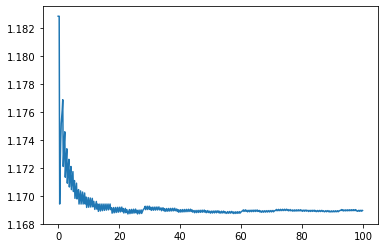

In [102]:
arr = (x[np.roll(np.argmax(u, axis=0), -1)]-x[np.argmax(u, axis=0)])/(t[1]-t[0])
#plt.plot(t[arr>0][:-1],arr[arr>0][:-1])
plt.plot(t[arr>0][:-1],np.cumsum(arr[arr>0][:-1])/np.arange(1,1+ len(arr[arr>0][:-1])))